# Black Friday Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
test_data = pd.read_csv("test.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df = train_data.append(test_data)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
#User Id column is not imp hence we will drop it
df.drop("User_ID", axis = 1, inplace= True)


In [8]:
df["Gender"] = df["Gender"].map({"M": 1 , "F" : 0})
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [9]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

#Now we will encode the Age column
df["Age"] = label_encoder.fit_transform(df["Age"])
df["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [13]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
city = pd.get_dummies(df["City_Category"], drop_first=True)

In [15]:
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [16]:
df = pd.concat([df, city], axis=1)

In [17]:
df.drop("City_Category", axis = 1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
Cat2_mode = df["Product_Category_2"].mode()[0]

In [23]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(Cat2_mode)

In [25]:
df["Product_Category_3"].isnull().sum()

545809

In [28]:
#in product category 3 we will replace nan values by the mode
Cat3_mode = df["Product_Category_3"].mode()[0]
df["Product_Category_3"] = df["Product_Category_3"].fillna(Cat3_mode)
df["Product_Category_3"].isnull().sum()

0

In [29]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
#remove + sign 
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+", "")
df["Stay_In_Current_City_Years"].unique()

C:\Users\ALTEM-~1\AppData\Local\Temp/ipykernel_23620/500251801.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+", "")


array(['2', '4', '3', '1', '0'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(4), object(2), uint8(2)
memory usage: 64.

In [32]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [33]:
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [34]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


compare the purchase veriable with differnt categoris with bar plot accorginf the the gender 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

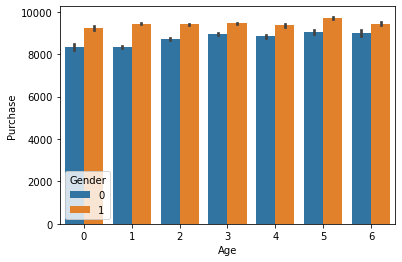

In [36]:
sns.barplot("Age" , "Purchase",data= df,  hue = "Gender" )

Purchase capacity of all the age groups are same and males are spending more than females

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

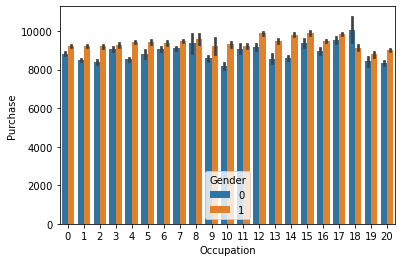

In [37]:
sns.barplot("Occupation", "Purchase", hue= "Gender", data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

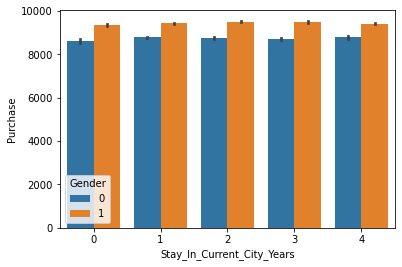

In [39]:
sns.barplot("Stay_In_Current_City_Years", "Purchase", hue= "Gender", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

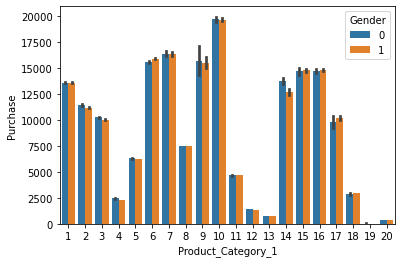

In [40]:
sns.barplot("Product_Category_1", "Purchase", hue= "Gender", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

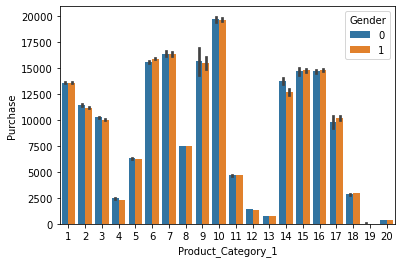

In [41]:
sns.barplot("Product_Category_1" , "Purchase",data= df,  hue = "Gender" )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

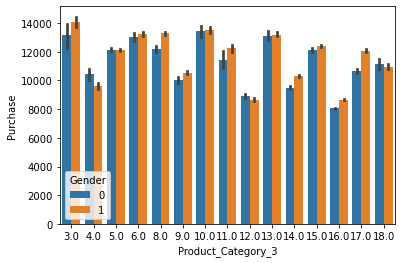

In [42]:
sns.barplot("Product_Category_3" , "Purchase",data= df,  hue = "Gender" )

In [44]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004758,0.116505,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346,-0.005399,-0.000180
Age,-0.004758,1.000000,0.090882,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839,-0.016881,0.110302
Occupation,0.116505,0.090882,1.000000,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833,-0.011721,0.035255
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422,0.011011,0.011007
Marital_Status,-0.010945,0.310747,0.023563,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463,-0.002804,0.034377
Product_Category_1,-0.046208,0.060336,-0.008441,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703,-0.003863,-0.012870
Product_Category_2,-0.011851,0.041716,0.001501,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651,-0.003944,-0.000443
Product_Category_3,-0.006651,0.036721,-0.001576,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945,0.004291,-0.020687
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.005399,-0.016881,-0.011721,0.011011,-0.002804,-0.003863,-0.003944,0.004291,-0.019098,1.000000,-0.572552
